# AMAZON CUSTOMER REVIEW 

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import random

In [2]:
df = pd.read_csv('/Users/macbook/Downloads/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df = df.set_index('id')
df.head(3)

,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
id,,,,,,,,,,,,,,,,,,,,,
AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
print( "Shape of the dataset is: ", df.shape)

Shape of the dataset is:  (28332, 23)


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28332 entries, AVpgNzjwLJeJML43Kpxn to AVqkIhxunnc1JgDc3kg_
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateAdded            28332 non-null  object 
 1   dateUpdated          28332 non-null  object 
 2   name                 28332 non-null  object 
 3   asins                28332 non-null  object 
 4   brand                28332 non-null  object 
 5   categories           28332 non-null  object 
 6   primaryCategories    28332 non-null  object 
 7   imageURLs            28332 non-null  object 
 8   keys                 28332 non-null  object 
 9   manufacturer         28332 non-null  object 
 10  manufacturerNumber   28332 non-null  object 
 11  reviews.date         28332 non-null  object 
 12  reviews.dateSeen     28332 non-null  object 
 13  reviews.didPurchase  9 non-null      object 
 14  reviews.doRecommend  16086 non-null  object 
 15  reviews

## Filtering Relevant and Needed Columns

In [5]:
var = [0,6,9,11,14,16,17,19,20,21]
df1 = df.iloc[:, var]

In [6]:
df1.head(3)

,dateAdded,primaryCategories,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
id,,,,,,,,,,
AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,Health & Beauty,AmazonBasics,2017-03-02T00:00:00.000Z,NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,Health & Beauty,AmazonBasics,2016-08-31T00:00:00.000Z,NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,Health & Beauty,AmazonBasics,2016-12-06T00:00:00.000Z,NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert


### Checking for Missing Values

In [7]:
df1.isnull().sum()/28332*100

dateAdded               0.000000
primaryCategories       0.000000
manufacturer            0.000000
reviews.date            0.000000
reviews.doRecommend    43.223211
reviews.numHelpful     43.120853
reviews.rating          0.000000
reviews.text            0.000000
reviews.title           0.000000
reviews.username        0.000000
dtype: float64

### Dropping all Missing Values

In [8]:
df1 = df1.dropna()
print("Shape of the Preprocessed data is : ",df1.shape)

Shape of the Preprocessed data is :  (16086, 10)


In [9]:
df1.isnull().sum()/28332*100

dateAdded              0.0
primaryCategories      0.0
manufacturer           0.0
reviews.date           0.0
reviews.doRecommend    0.0
reviews.numHelpful     0.0
reviews.rating         0.0
reviews.text           0.0
reviews.title          0.0
reviews.username       0.0
dtype: float64

In [10]:
#convert the date column into a datetime object
df1['reviews.date'] = pd.to_datetime(df1['reviews.date'])


In [11]:

# extract the day, month, and year components
# df1['day'] = df1['reviews.date'].dt.day
df1['month'] = df1['reviews.date'].dt.month
df1['year'] = df1['reviews.date'].dt.year

In [12]:
df1.head()

,dateAdded,primaryCategories,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,month,year
id,,,,,,,,,,,,
AWYAV-i9Iwln0LfXqrUq,2018-09-21T19:44:16Z,Electronics,Amazon,2018-12-07 18:14:33+00:00,True,0.0,4,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...",ALEXA ENABLED DEVICE WITH SCREEN.,ECHO VIDEO,12,2018
AWYAV-i9Iwln0LfXqrUq,2018-09-21T19:44:16Z,Electronics,Amazon,2018-12-04 18:35:15+00:00,True,0.0,5,"I wasn't sure I even wanted this item, but cau...",Gotta have this one!!,Wilbert,12,2018
AVpfIfGA1cnluZ0-emyp,2015-12-09T08:57:06Z,Electronics,Amazon,2017-01-02 00:00:00+00:00,True,0.0,5,It seems to work just like any other usb plug ...,A charger,Mikey123456789,1,2017
AVpfIfGA1cnluZ0-emyp,2015-12-09T08:57:06Z,Electronics,Amazon,2016-06-03 00:00:00+00:00,True,2.0,5,got this for my kindle 7 tablet . Does an exce...,amazon power fast usb charger,diamond,6,2016
AVpfIfGA1cnluZ0-emyp,2015-12-09T08:57:06Z,Electronics,Amazon,2016-11-21 00:00:00+00:00,True,0.0,5,Best kindle charger ever. Took 30 minutes to b...,Amazon powerfast wall charger,Pat91,11,2016


## Exploratory Data Analysis (EDA)

## What is the distribution of review scores across all products?

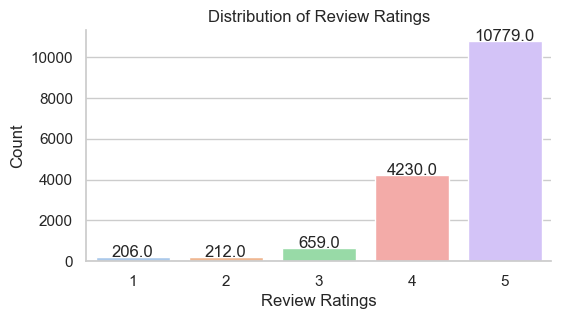

In [13]:
# Set seaborn style to minimal and pastel color palette
sns.set(style="whitegrid", palette="pastel")

# Visualization 1: Distribution of review scores
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='reviews.rating', data=df1)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Ratings')
plt.ylabel('Count')

# Print the value of reviews distribution above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

sns.despine()
plt.show()


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16086 entries, AWYAV-i9Iwln0LfXqrUq to AVqkIhxunnc1JgDc3kg_
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dateAdded            16086 non-null  object             
 1   primaryCategories    16086 non-null  object             
 2   manufacturer         16086 non-null  object             
 3   reviews.date         16086 non-null  datetime64[ns, UTC]
 4   reviews.doRecommend  16086 non-null  object             
 5   reviews.numHelpful   16086 non-null  float64            
 6   reviews.rating       16086 non-null  int64              
 7   reviews.text         16086 non-null  object             
 8   reviews.title        16086 non-null  object             
 9   reviews.username     16086 non-null  object             
 10  month                16086 non-null  int64              
 11  year                 16086 non-null  int64         

/var/folders/v9/y2qkf5bd43gg37qjgt5sfhvc0000gn/T/ipykernel_5566/3498654567.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['reviews.rating'], shade=True)


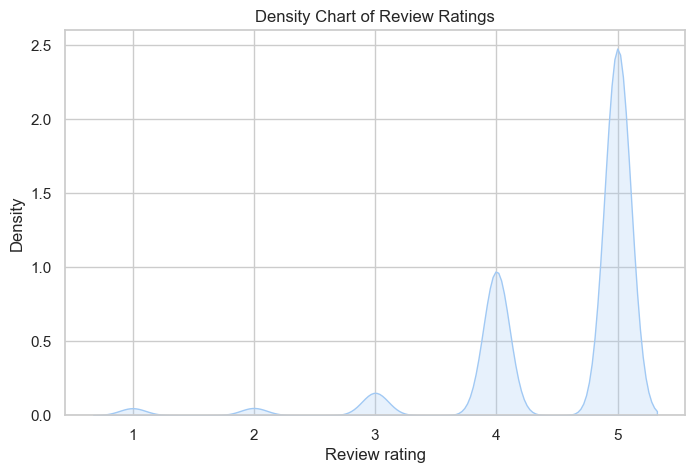

In [15]:
# Create a density chart for the Score column
plt.figure(figsize=(8, 5))
sns.kdeplot(df1['reviews.rating'], shade=True)
plt.title('Density Chart of Review Ratings')
plt.xlabel('Review rating')
plt.ylabel('Density')
plt.show()

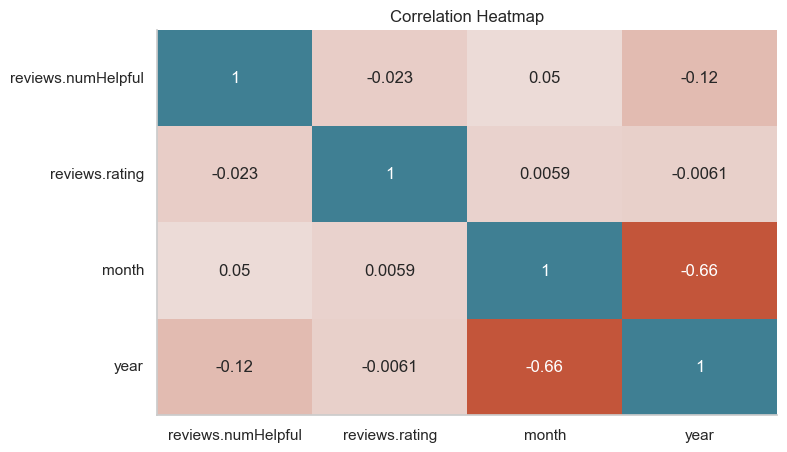

Correlation Values Table:
                    reviews.numHelpful  reviews.rating   month    year
reviews.numHelpful              1.0000         -0.0226  0.0502 -0.1182
reviews.rating                 -0.0226          1.0000  0.0059 -0.0061
month                           0.0502          0.0059  1.0000 -0.6593
year                           -0.1182         -0.0061 -0.6593  1.0000


In [16]:
#  Visualization 2: Correlation between numeric columns
numeric_columns = ['reviews.numHelpful', 'reviews.rating', 'month', 'year']
correlation_matrix = df1[numeric_columns].corr()

# Use a custom colormap for the heatmap (pastel light orange to light blue, reversed)
cmap = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, cbar=False)
plt.title('Correlation Heatmap')
sns.despine()
plt.show()

# Display the correlation values as a table using Pandas formatting options
print("Correlation Values Table:")
print(correlation_matrix.round(4).to_string())

## Display the summary of the DataFrame

In [17]:
from IPython.display import display, HTML

print(df1.info(verbose=True))
display(HTML(df1.head().to_html(index=False)))

<class 'pandas.core.frame.DataFrame'>
Index: 16086 entries, AWYAV-i9Iwln0LfXqrUq to AVqkIhxunnc1JgDc3kg_
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dateAdded            16086 non-null  object             
 1   primaryCategories    16086 non-null  object             
 2   manufacturer         16086 non-null  object             
 3   reviews.date         16086 non-null  datetime64[ns, UTC]
 4   reviews.doRecommend  16086 non-null  object             
 5   reviews.numHelpful   16086 non-null  float64            
 6   reviews.rating       16086 non-null  int64              
 7   reviews.text         16086 non-null  object             
 8   reviews.title        16086 non-null  object             
 9   reviews.username     16086 non-null  object             
 10  month                16086 non-null  int64              
 11  year                 16086 non-null  int64         

dateAdded,primaryCategories,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,month,year
2018-09-21T19:44:16Z,Electronics,Amazon,2018-12-07 18:14:33+00:00,True,0.0,4,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, IT'S A GREAT LITTLE DEVICE. FOR THOSE THAT PREFER A LARGER SCREEN, THE ECHO SHOW WOULD BE A BETTER CHOICE.",ALEXA ENABLED DEVICE WITH SCREEN.,ECHO VIDEO,12,2018
2018-09-21T19:44:16Z,Electronics,Amazon,2018-12-04 18:35:15+00:00,True,0.0,5,"I wasn't sure I even wanted this item, but caught up in all the excitement surrounding the Alexa enabled devices. Well....after getting it home I became addicted and ordered two Echos for the entertainment stand and today I have to Sub coming. I can't say enough for the product as well as the quick service/pick up at the Target store. Great service and product!",Gotta have this one!!,Wilbert,12,2018
2015-12-09T08:57:06Z,Electronics,Amazon,2017-01-02 00:00:00+00:00,True,0.0,5,It seems to work just like any other usb plug in charger.,A charger,Mikey123456789,1,2017
2015-12-09T08:57:06Z,Electronics,Amazon,2016-06-03 00:00:00+00:00,True,2.0,5,got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire,amazon power fast usb charger,diamond,6,2016
2015-12-09T08:57:06Z,Electronics,Amazon,2016-11-21 00:00:00+00:00,True,0.0,5,Best kindle charger ever. Took 30 minutes to being my kindle back to life.,Amazon powerfast wall charger,Pat91,11,2016


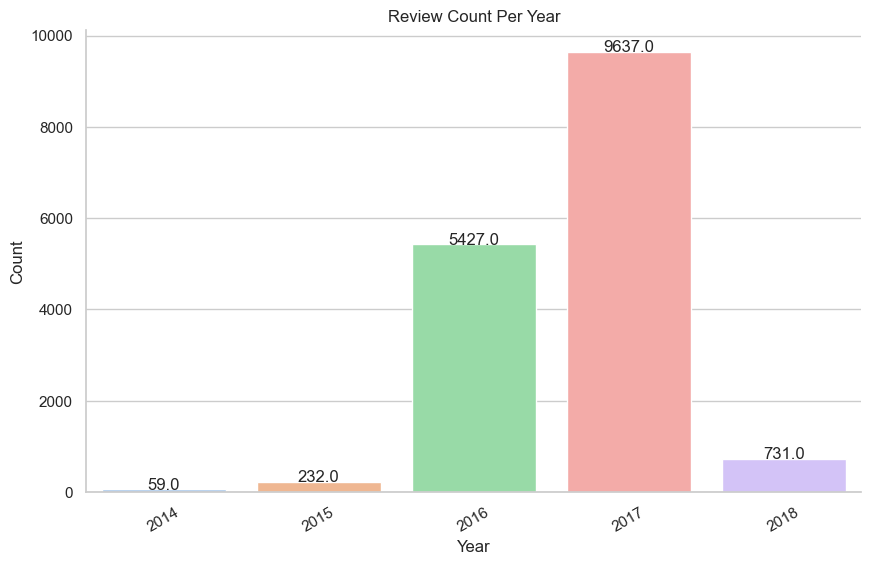

In [18]:
# Convert UNIX timestamp to datetime object
# df1['year'] = pd.to_datetime(df1['year'], unit='s')

# Review count per year
# df['Year'] = df1['Time'].dt.year
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='year', data=df1)
plt.title('Review Count Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 30)
# Print the value of reviews distribution above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

sns.despine()
plt.show()


# Business Questions

## What are the most popular products based on the number of reviews?

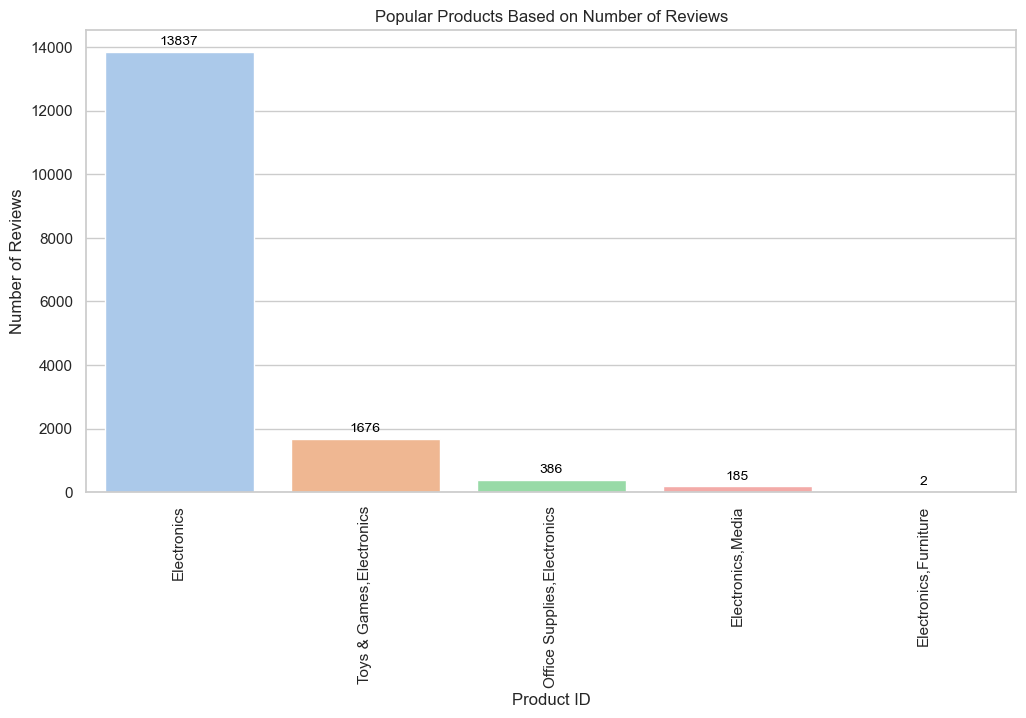

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette for seaborn
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Count the number of reviews for each product and sort by the top 20
popular_products = df1['primaryCategories'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=popular_products.index, y=popular_products.values)

# Customize the chart
plt.title("Popular Products Based on Number of Reviews")
plt.xlabel("Product ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)

# Add the value above the top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Show the chart
plt.show()

## What is the average score for each product and which products have the highest and lowest average scores?

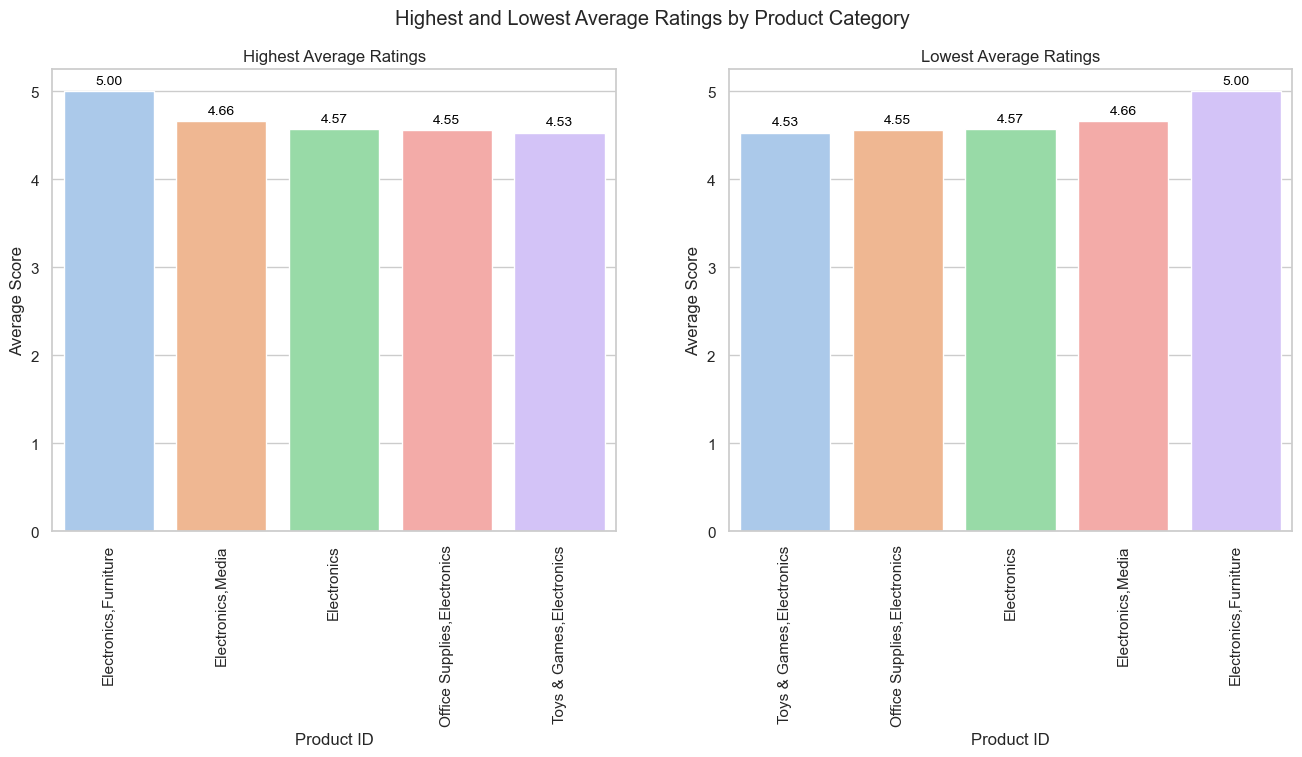

In [20]:

# Calculate the average score for each product
average_scores = df1.groupby('primaryCategories')['reviews.rating'].mean()

# Get the top 10 highest and lowest average scores
highest_average_scores = average_scores.nlargest(10)
lowest_average_scores = average_scores.nsmallest(10)

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Highest and Lowest Average Ratings by Product Category')

# Create the highest average scores bar chart
bar_plot1 = sns.barplot(x=highest_average_scores.index, y=highest_average_scores.values, ax=ax1, palette='pastel')
ax1.set_title('Highest Average Ratings')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Average Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Add the value above the top of each bar
for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Create the lowest average scores bar chart
bar_plot2 = sns.barplot(x=lowest_average_scores.index, y=lowest_average_scores.values, ax=ax2, palette='pastel')
ax2.set_title('Lowest Average Ratings')
ax2.set_xlabel('Product ID')
ax2.set_ylabel('Average Score')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Add the value above the top of each bar
for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Show the charts
plt.show()


## How do review scores change over time for the most popular products?

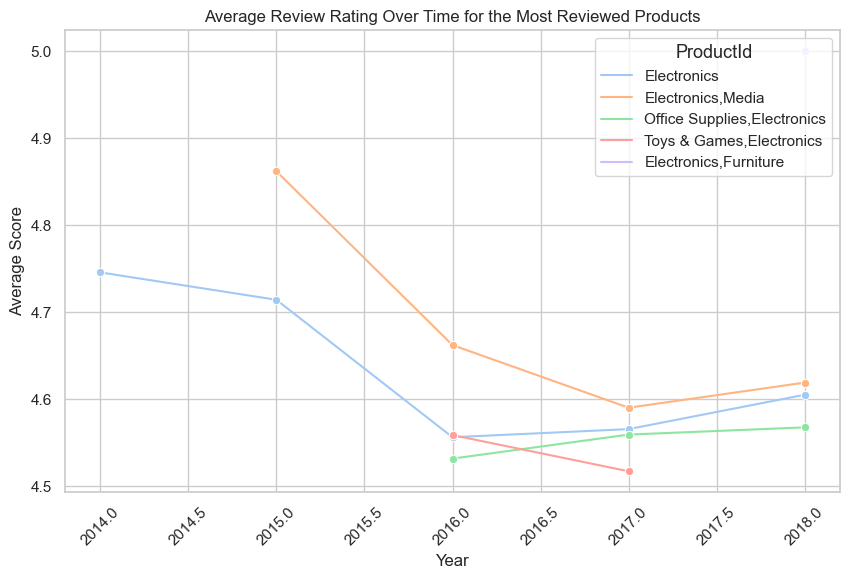

In [21]:
# Identify the top 5 most reviewed products
top_5_products = df1['primaryCategories'].value_counts().index.tolist()

# Filter the dataset to include only the top 5 most reviewed products
top_5_df = df1[df1['primaryCategories'].isin(top_5_products)]

# Calculate the average score for each product by year
top_5_yearly_avg = top_5_df.groupby(['year', 'primaryCategories'])['reviews.rating'].mean().reset_index()

# Create the pastel-colored line plot
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.lineplot(x='year', y='reviews.rating', hue='primaryCategories', data=top_5_yearly_avg, marker='o')

plt.title('Average Review Rating Over Time for the Most Reviewed Products')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.legend(title='ProductId', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)
plt.show()

## Are there any seasonal trends in the volume or sentiment of reviews (using the "Month" column)?

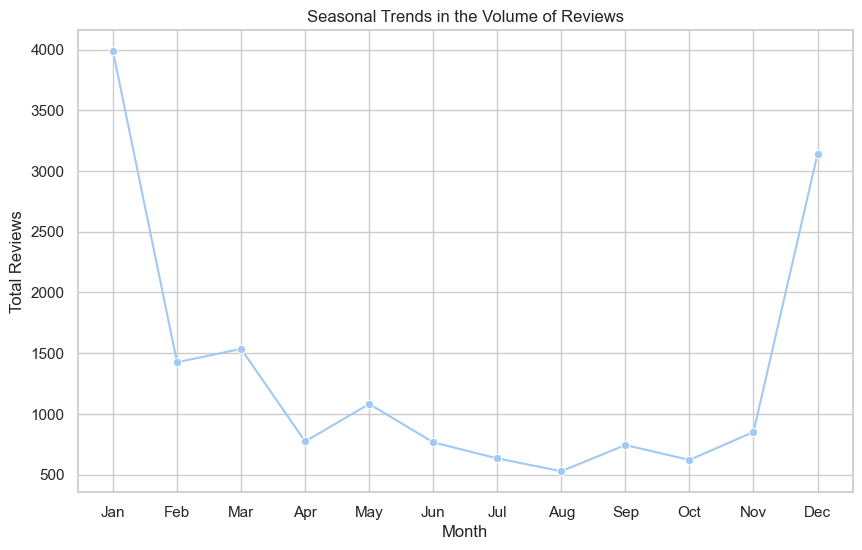

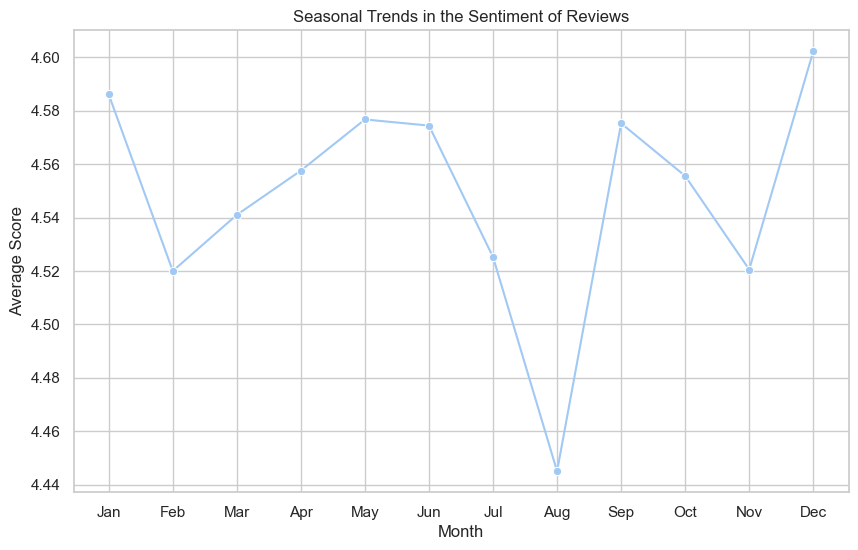

In [22]:
# Extract the month from the "Time" column
# df['Month'] = df['Time'].dt.month

# Calculate the total number of reviews and average score for each month
monthly_stats = df1.groupby('month').agg({'reviews.rating': ['count', 'mean']}).reset_index()
monthly_stats.columns = ['month', 'Total Reviews', 'Average Score']

# Create a pastel-colored line plot for the volume of reviews
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.lineplot(x='month', y='Total Reviews', data=monthly_stats, marker='o')

plt.title('Seasonal Trends in the Volume of Reviews')
plt.xlabel('Month')
plt.ylabel('Total Reviews')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Create a pastel-colored line plot for the sentiment of reviews
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.lineplot(x='month', y='Average Score', data=monthly_stats, marker='o')

plt.title('Seasonal Trends in the Sentiment of Reviews')
plt.xlabel('Month')
plt.ylabel('Average Score')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Are there any seasonal trends in the volume or sentiment of reviews every six months?

In [23]:
# import matplotlib.dates as mdates
# monthly_stats['Year-Month'] = df1['year'].astype(str) + '-' + df1['month'].astype(str)

# # Convert the "Year-Month" column back to a datetime object for better tick formatting
# monthly_stats['Year-Month'] = pd.to_datetime(monthly_stats['Year-Month'])

# fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# sns.set_palette("pastel")

# # Volume of Reviews
# sns.lineplot(ax=axes[0], x='Year-Month', y='Total Reviews', data=monthly_stats, marker='o')
# axes[0].set_title('Trends in the Volume of Reviews')
# axes[0].set_xlabel('Year-Month')
# axes[0].set_ylabel('Total Reviews')
# axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.setp(axes[0].get_xticklabels(), rotation=45)

# # Sentiment of Reviews
# sns.lineplot(ax=axes[1], x='Year-Month', y='Average Score', data=monthly_stats, marker='o')
# axes[1].set_title('Trends in the Sentiment of Reviews')
# axes[1].set_xlabel('Year-Month')
# axes[1].set_ylabel('Average Score')
# axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.setp(axes[1].get_xticklabels(), rotation=45)

# plt.tight_layout()
# plt.show()


## How does the length of a review (in terms of words) correlate with the review score?

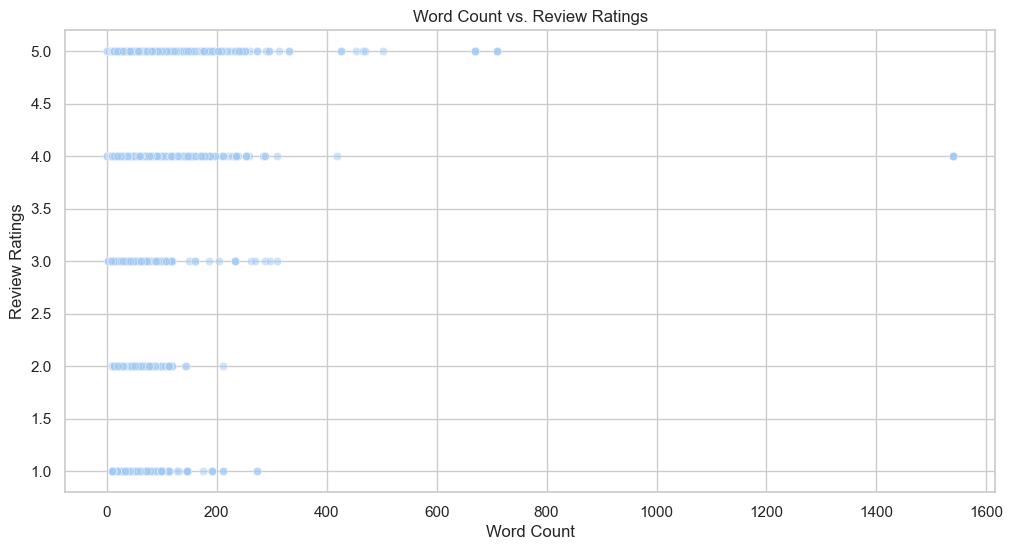

                  count       mean        std  min    25%   50%   75%     max
reviews.rating                                                               
1                 206.0  49.203883  48.604298  9.0  15.00  28.0  71.0   274.0
2                 212.0  45.976415  32.997406  9.0  18.75  38.5  69.0   212.0
3                 659.0  36.030349  36.398282  3.0  16.00  24.0  46.0   310.0
4                4230.0  33.595272  55.511698  1.0  14.00  22.0  39.0  1539.0
5               10779.0  28.169496  31.405337  1.0  13.00  19.0  32.0   709.0


In [24]:
# Add a new column with the word count of each review
df1['Word Count'] = df1['reviews.text'].apply(lambda x: len(x.split()))

# Create a scatterplot to visualize the relationship between word count and review score
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.scatterplot(x='Word Count', y='reviews.rating', data=df1, alpha=0.5)
plt.title('Word Count vs. Review Ratings')
plt.xlabel('Word Count')
plt.ylabel('Review Ratings')
plt.show()
# Group the data by 'Score' and get the summary statistics for the 'Word Count' column
score_word_count_summary = df1.groupby('reviews.rating')['Word Count'].describe()
print(score_word_count_summary)

## Top 10 Positive and Negative Words

In [25]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import random
import string
import nltk
# nltk.download('punkt')

# nltk.download('stopwords')

In [26]:
stop_words = set(stopwords.words("english"))

# Add common and less informative words to the stopwords list
stop_words.update(["br", "like", "one", "hate", "don't"])

# Filter high-score (positive) and low-score (negative) reviews
positive_reviews = df1[df1['reviews.rating'] >= 4]['reviews.text'].sample(frac=0.1, random_state=42)
negative_reviews = df1[df1['reviews.rating'] <= 2]['reviews.text'].sample(frac=0.1, random_state=42)

In [27]:
# Preprocess the text and remove stopwords, punctuation, and non-alphabetic characters
positive_words = [
    word.lower() for review in positive_reviews for word in nltk.word_tokenize(review) if word.lower() not in stop_words and word.lower() not in string.punctuation and word.isalpha()
]
negative_words = [
    word.lower() for review in negative_reviews for word in nltk.word_tokenize(review) if word.lower() not in stop_words and word.lower() not in string.punctuation and word.isalpha()
]

In [28]:
# Count the occurrences of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

import pandas as pd

# Create a DataFrame for the most common words in positive and negative reviews
common_words_df = pd.DataFrame({
    'Positive Words': [word for word, count in positive_word_counts.most_common(15)],
    'Positive Counts': [count for word, count in positive_word_counts.most_common(15)],
    'Negative Words': [word for word, count in negative_word_counts.most_common(15)],
    'Negative Counts': [count for word, count in negative_word_counts.most_common(15)]
})

common_words_df

,Positive Words,Positive Counts,Negative Words,Negative Counts
0,tablet,594,tablet,18
1,great,526,charge,10
2,use,335,buy,10
3,love,293,back,9
4,kindle,274,old,8
5,easy,261,bought,8
6,bought,252,use,8
7,good,218,fire,7
8,loves,207,year,7
9,kids,203,apps,7


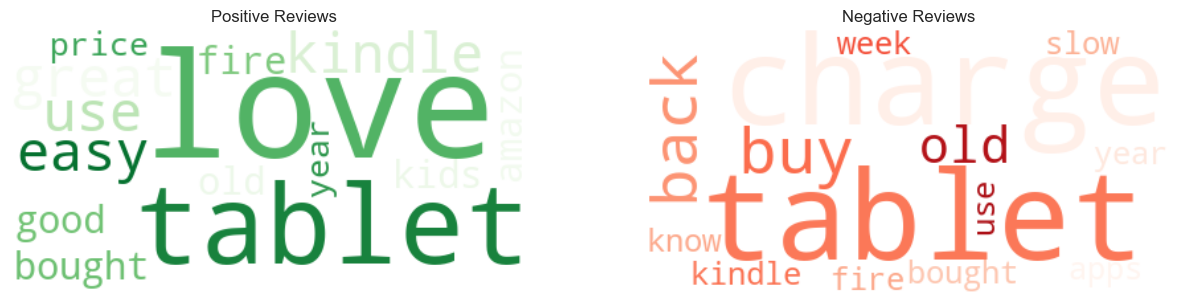

In [29]:
from wordcloud import WordCloud

# Generate word clouds
positive_wordcloud = WordCloud(background_color='white', colormap='Greens')
negative_wordcloud = WordCloud(background_color='white', colormap='Reds')

positive_text = ' '.join(common_words_df['Positive Words'])
negative_text = ' '.join(common_words_df['Negative Words'])

positive_wordcloud.generate(positive_text)
negative_wordcloud.generate(negative_text)

# Plot the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Reviews')
axes[0].axis('off')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Reviews')
axes[1].axis('off')

plt.show()


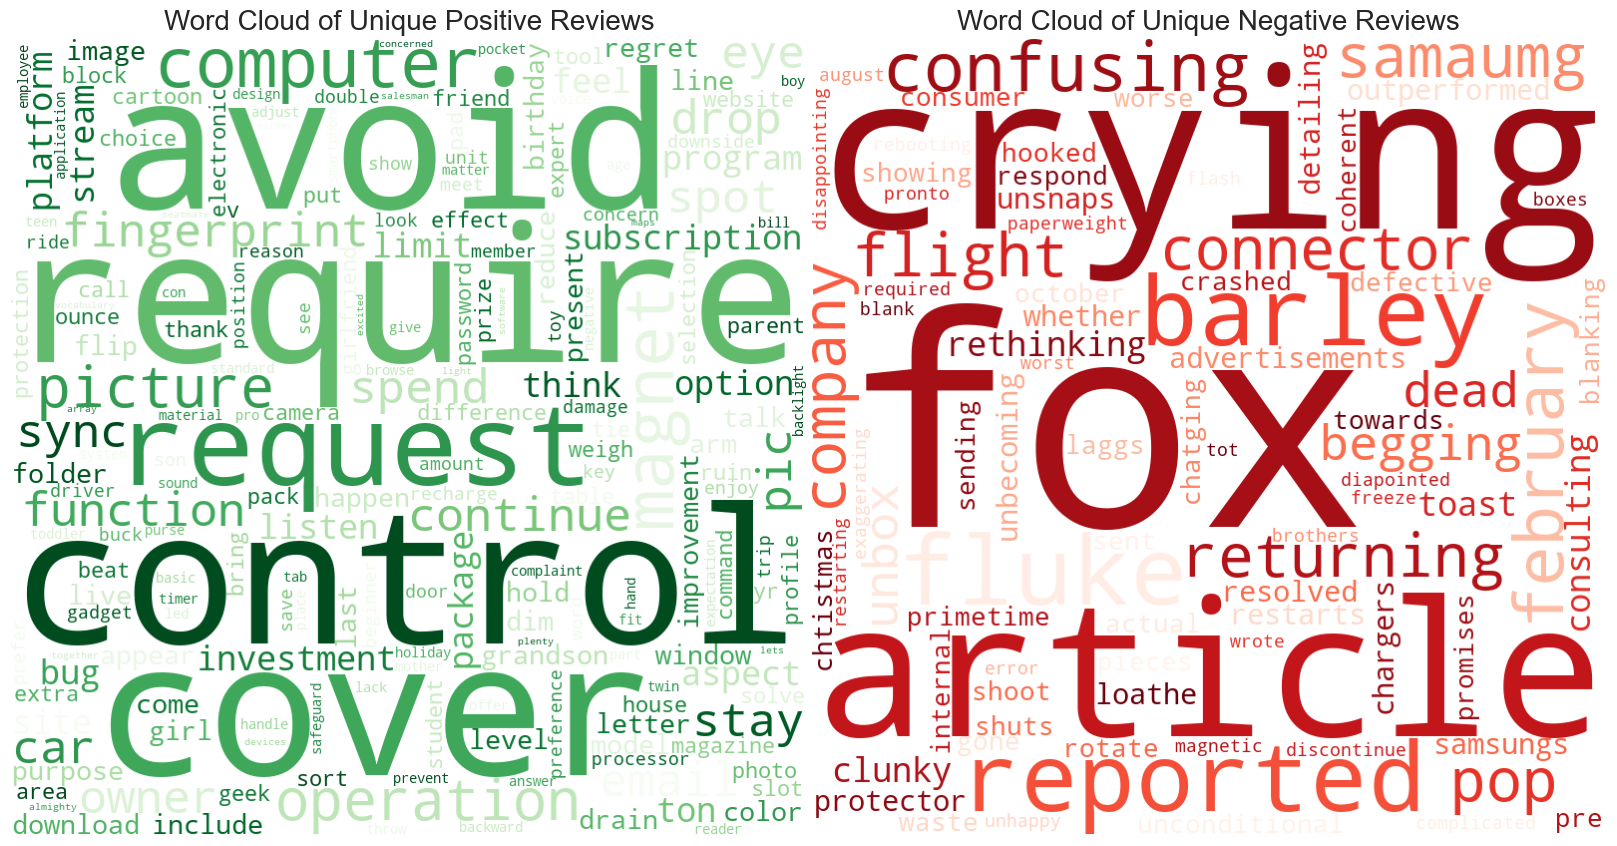

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_set = set(positive_words)
negative_set = set(negative_words)

unique_positive_words = list(positive_set - negative_set)
unique_negative_words = list(negative_set - positive_set)



def plot_wordcloud(words1, words2, title1, title2):
    wordcloud1 = WordCloud(width=800, height=800, background_color='white', colormap='Greens', min_font_size=10).generate(" ".join(words1))
    wordcloud2 = WordCloud(width=800, height=800, background_color='white', colormap='Reds', min_font_size=10).generate(" ".join(words2))

    fig, axes = plt.subplots(1, 2, figsize=(16, 8), facecolor=None)

    axes[0].imshow(wordcloud1)
    axes[0].set_title(title1, fontsize=20)
    axes[0].axis("off")

    axes[1].imshow(wordcloud2)
    axes[1].set_title(title2, fontsize=20)
    axes[1].axis("off")

    plt.tight_layout(pad=0)
    plt.show()

plot_wordcloud(unique_positive_words, unique_negative_words, "Word Cloud of Unique Positive Reviews", "Word Cloud of Unique Negative Reviews")


## Are there any recurring themes in the most helpful reviews (those with the highest HelpfulnessNumerator)?

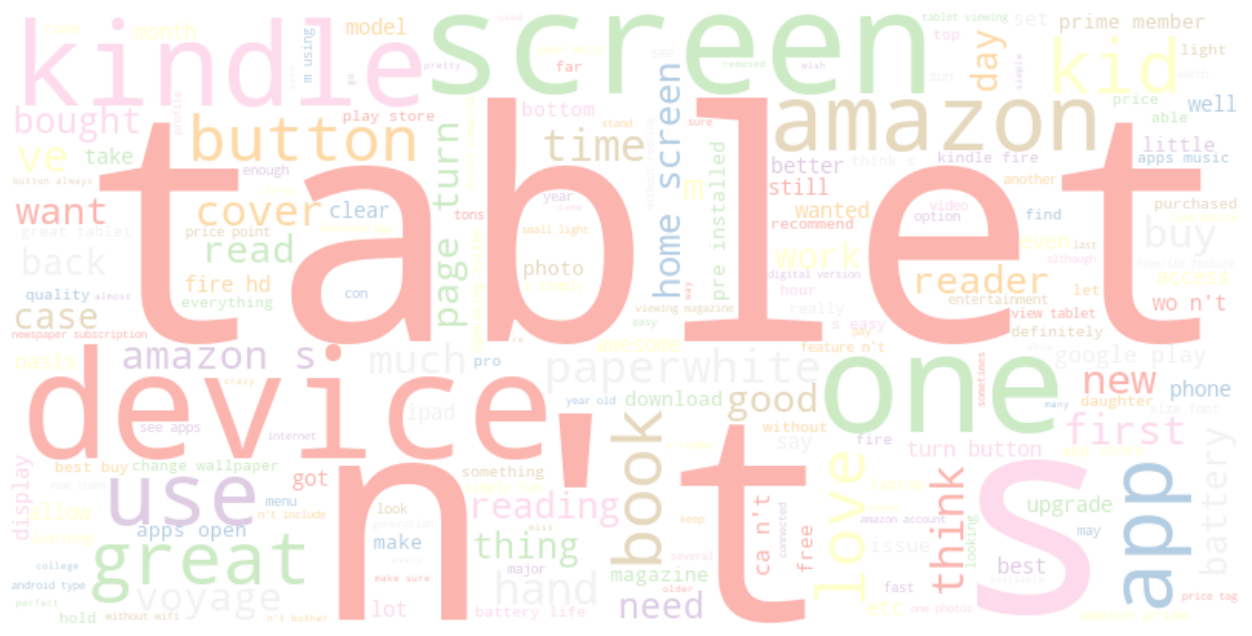

In [31]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# Filter the top 100 most helpful reviews
top_helpful_reviews = df1.nlargest(100, 'reviews.numHelpful')['reviews.text']

# Preprocess the text and remove stopwords
processed_text = ' '.join(
    [word.lower() for review in top_helpful_reviews for word in nltk.word_tokenize(review) if word.lower() not in stop_words]
)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Pastel1').generate(processed_text)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## What are the most common words or phrases used in review summaries for different score levels? 

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from collections import Counter
import pandas as pd

# nltk.download('stopwords')
# nltk.download('punkt')

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Group the dataset by Score and concatenate summaries
summary_by_score = df1.groupby('reviews.rating')['reviews.title'].apply(lambda x: ' '.join(x)).reset_index()

# Preprocess text and get most common words for each score level
summary_by_score['Tokenized_Summary'] = summary_by_score['reviews.title'].apply(preprocess_text)
summary_by_score['Most_Common_Words'] = summary_by_score['Tokenized_Summary'].apply(lambda x: Counter(x).most_common(10))

# Display the most common words for each score level in a readable table
common_words_table = pd.DataFrame(summary_by_score[['reviews.rating', 'Most_Common_Words']])
common_words_table = common_words_table.explode('Most_Common_Words')
common_words_table[['Word', 'Count']] = pd.DataFrame(common_words_table['Most_Common_Words'].tolist(), index=common_words_table.index)
common_words_table = common_words_table.drop(columns=['Most_Common_Words']).reset_index(drop=True)

display(common_words_table)

,reviews.rating,Word,Count
0,1,tablet,17
1,1,good,11
2,1,product,10
3,1,horrible,10
4,1,terrible,10
5,1,charging,10
6,1,kids,10
7,1,work,9
8,1,ads,8
9,1,like,8


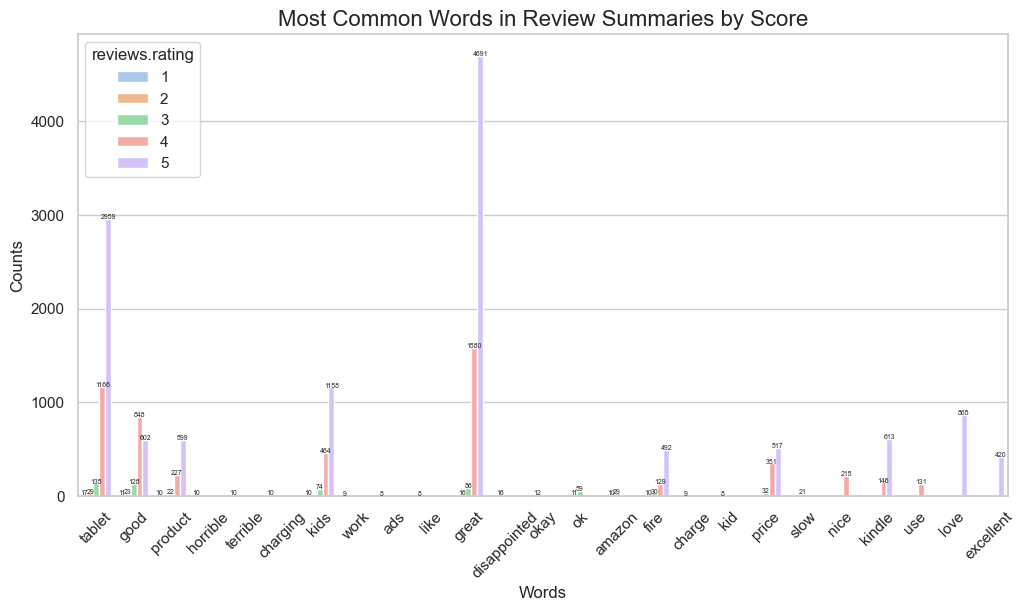

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = sns.color_palette("pastel", 5)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_table, x='Word', y='Count', hue='reviews.rating', palette=colors)

# Add a title and labels
plt.title('Most Common Words in Review Summaries by Score', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45)

# Show the values above the bars
for p in plt.gca().patches:
    if not np.isnan(p.get_height()):
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='baseline', fontsize=5)
plt.show()

# Machine Learning

In [35]:
df1['Satisfaction'] = df1['reviews.rating']

In [36]:
df1['Satisfaction'] = df1['Satisfaction'].replace([3,4,5], 'Satisfied')
# df1['Satisfaction'] = df1['Satisfaction'].replace([3], 'Unsure')
df1['Satisfaction'] = df1['Satisfaction'].replace([1,2], 'Unsatisfied')

In [37]:
df1.head()

,dateAdded,primaryCategories,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,month,year,Word Count,Satisfaction
id,,,,,,,,,,,,,,
AWYAV-i9Iwln0LfXqrUq,2018-09-21T19:44:16Z,Electronics,Amazon,2018-12-07 18:14:33+00:00,True,0.0,4,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...",ALEXA ENABLED DEVICE WITH SCREEN.,ECHO VIDEO,12,2018,29,Satisfied
AWYAV-i9Iwln0LfXqrUq,2018-09-21T19:44:16Z,Electronics,Amazon,2018-12-04 18:35:15+00:00,True,0.0,5,"I wasn't sure I even wanted this item, but cau...",Gotta have this one!!,Wilbert,12,2018,64,Satisfied
AVpfIfGA1cnluZ0-emyp,2015-12-09T08:57:06Z,Electronics,Amazon,2017-01-02 00:00:00+00:00,True,0.0,5,It seems to work just like any other usb plug ...,A charger,Mikey123456789,1,2017,12,Satisfied
AVpfIfGA1cnluZ0-emyp,2015-12-09T08:57:06Z,Electronics,Amazon,2016-06-03 00:00:00+00:00,True,2.0,5,got this for my kindle 7 tablet . Does an exce...,amazon power fast usb charger,diamond,6,2016,29,Satisfied
AVpfIfGA1cnluZ0-emyp,2015-12-09T08:57:06Z,Electronics,Amazon,2016-11-21 00:00:00+00:00,True,0.0,5,Best kindle charger ever. Took 30 minutes to b...,Amazon powerfast wall charger,Pat91,11,2016,14,Satisfied


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16086 entries, AWYAV-i9Iwln0LfXqrUq to AVqkIhxunnc1JgDc3kg_
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dateAdded            16086 non-null  object             
 1   primaryCategories    16086 non-null  object             
 2   manufacturer         16086 non-null  object             
 3   reviews.date         16086 non-null  datetime64[ns, UTC]
 4   reviews.doRecommend  16086 non-null  object             
 5   reviews.numHelpful   16086 non-null  float64            
 6   reviews.rating       16086 non-null  int64              
 7   reviews.text         16086 non-null  object             
 8   reviews.title        16086 non-null  object             
 9   reviews.username     16086 non-null  object             
 10  month                16086 non-null  int64              
 11  year                 16086 non-null  int64         

In [34]:
var = [1,4,5,12, 6]
df2 = df1.iloc[:, var]
df2.head()

,primaryCategories,reviews.doRecommend,reviews.numHelpful,Word Count,reviews.rating
id,,,,,
AWYAV-i9Iwln0LfXqrUq,Electronics,True,0.0,29,4
AWYAV-i9Iwln0LfXqrUq,Electronics,True,0.0,64,5
AVpfIfGA1cnluZ0-emyp,Electronics,True,0.0,12,5
AVpfIfGA1cnluZ0-emyp,Electronics,True,2.0,29,5
AVpfIfGA1cnluZ0-emyp,Electronics,True,0.0,14,5


In [35]:
freq = df2['reviews.rating'].value_counts()
freq

5    10779
4     4230
3      659
2      212
1      206
Name: reviews.rating, dtype: int64

ValueError: 'label' must be of length 'x'

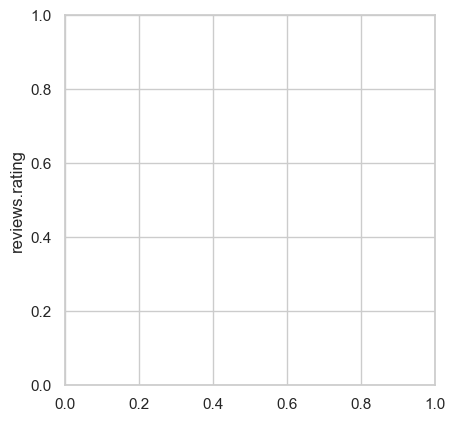

In [36]:
# ax = freq.plot.pie(autopct='%.1f', labels = ["Satisfied", "Unsure", 'Unsatisfied'])
ax = freq.plot.pie(autopct='%.1f', labels = ["Satisfied", 'Unsatisfied'])

ax.set_title('Pie Chart Distribution of Satisfaction')
ax.set_aspect(1)
ax.set_ylabel('')

In [38]:
from sklearn.preprocessing import LabelEncoder
 
### Classifiers and Predictions
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [39]:
vv = [0,1]
for i in df2.iloc[:, vv]:
    df2[i] = LabelEncoder().fit_transform(df2[i])
df2.head()

/var/folders/v9/y2qkf5bd43gg37qjgt5sfhvc0000gn/T/ipykernel_5566/1680619389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = LabelEncoder().fit_transform(df2[i])
/var/folders/v9/y2qkf5bd43gg37qjgt5sfhvc0000gn/T/ipykernel_5566/1680619389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = LabelEncoder().fit_transform(df2[i])


,primaryCategories,reviews.doRecommend,reviews.numHelpful,Word Count,reviews.rating
id,,,,,
AWYAV-i9Iwln0LfXqrUq,0,1,0.0,29,4
AWYAV-i9Iwln0LfXqrUq,0,1,0.0,64,5
AVpfIfGA1cnluZ0-emyp,0,1,0.0,12,5
AVpfIfGA1cnluZ0-emyp,0,1,2.0,29,5
AVpfIfGA1cnluZ0-emyp,0,1,0.0,14,5


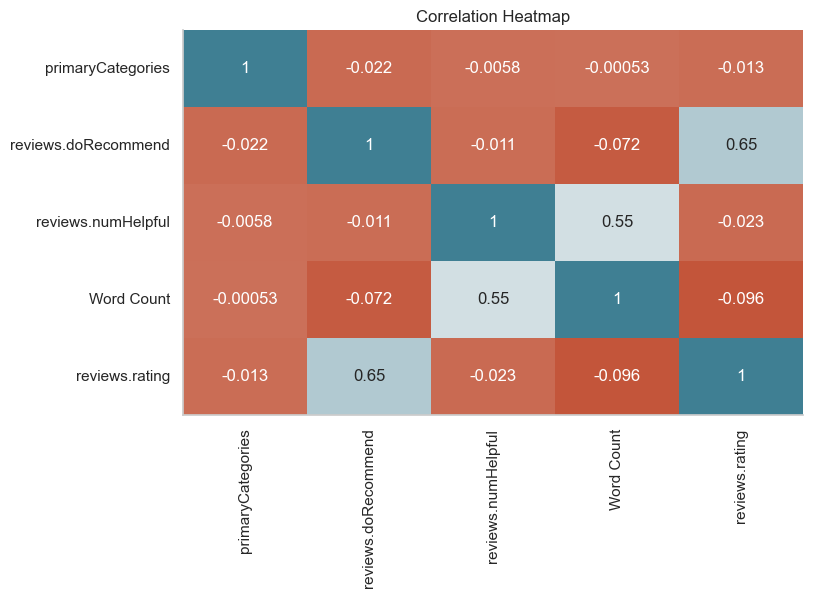

Correlation Values Table:
                     primaryCategories  reviews.doRecommend  reviews.numHelpful  Word Count  reviews.rating
primaryCategories               1.0000              -0.0219             -0.0058     -0.0005         -0.0127
reviews.doRecommend            -0.0219               1.0000             -0.0110     -0.0720          0.6481
reviews.numHelpful             -0.0058              -0.0110              1.0000      0.5459         -0.0226
Word Count                     -0.0005              -0.0720              0.5459      1.0000         -0.0963
reviews.rating                 -0.0127               0.6481             -0.0226     -0.0963          1.0000


In [40]:
#  Visualization 2: Correlation between numeric columns
# numeric_columns = ['reviews.numHelpful', 'reviews.rating', 'month', 'year']
correlation_matrix = df2.corr()

# Use a custom colormap for the heatmap (pastel light orange to light blue, reversed)
cmap = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, cbar=False)
plt.title('Correlation Heatmap')
sns.despine()
plt.show()

# Display the correlation values as a table using Pandas formatting options
print("Correlation Values Table:")
print(correlation_matrix.round(4).to_string())

## Splitting the Data

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import f1_score

In [42]:
from sklearn.model_selection import train_test_split

# Splitting dataset into features and targets
x = df2.iloc[:, df2.columns != "reviews.rating"]
y = df2.iloc[:, df2.columns == "reviews.rating"]

# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12868, 4)
(12868, 1)
(3218, 4)
(3218, 1)


In [44]:
# Standardizing the data using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaler, columns=x_test.columns)
# display(x_train.head())
# display(x_test.head())

In [45]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train.shape)
print("The shape of x_test_scaler is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (12868, 4)
The shape of x_test_scaler is:  (3218, 4)
The shape of y_train is:  (12868, 1)
The shape of y_test is:  (3218, 1)


In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Standardizing the data using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaler, columns=x_test.columns)


display(x_train.head())
display(x_test.head())

# # checking the shape of the train and test datasets

# print("The shape of x_train_scaler is: ",x_train.shape)
# print("The shape of x_test_scaler is: ",x_test.shape)
# print("The shape of y_train is: ",y_train.shape)
# print("The shape of y_test is: ",y_test.shape)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

(12868, 4)
(12868, 1)
(3218, 4)
(3218, 1)


,primaryCategories,reviews.doRecommend,reviews.numHelpful,Word Count
0,-0.397266,0.221151,-0.106666,-0.422881
1,-0.397266,0.221151,-0.106666,1.753954
2,-0.397266,0.221151,-0.106666,0.109235
3,-0.397266,0.221151,-0.106666,-0.060075
4,-0.397266,0.221151,-0.106666,-0.374507


,primaryCategories,reviews.doRecommend,reviews.numHelpful,Word Count
0,-0.397266,0.221151,-0.106666,-0.132636
1,-0.397266,0.221151,-0.106666,0.375292
2,-0.397266,0.221151,-0.106666,-0.471255
3,-0.397266,0.221151,-0.106666,-0.374507
4,-0.397266,0.221151,-0.106666,-0.326132


In [56]:
rcf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrc = LogisticRegression()
from sklearn import svm
svm = svm.SVC(kernel="linear")

In [54]:
from sklearn import svm
svm = svm.SVC()
rcf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lrc = LogisticRegression(random_state=42)
gnb = GaussianNB()


In [55]:
model_list = [rcf, dt, lrc, svm, gnb]

train_acc = []
test_acc = []
train_pre = []
test_pre = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []


for i in model_list:
    i_model = i.fit(x_train_scaler,y_train)
    y_train_pred = i_model.predict(x_train_scaler)
    y_test_pred = i_model.predict(x_test_scaler)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))
#     train_rec.append(recall_score(y_train,y_train_pred))
#     test_rec.append(recall_score(y_test,y_test_pred))
#     train_pre.append(precision_score(y_train,y_train_pred))
#     test_pre.append(precision_score(y_test,y_test_pred))
#     train_f1.append(f1_score(y_train,y_train_pred))
#     test_f1.append(f1_score(y_test,y_test_pred))

/var/folders/v9/y2qkf5bd43gg37qjgt5sfhvc0000gn/T/ipykernel_5566/3604827789.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i_model = i.fit(x_train_scaler,y_train)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

In [57]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression' : lrc,
    'RCF Classifier': rcf,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb,
    'SVM': svm
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test_pred, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           1       1.00      0.07      0.13       112
           2       0.25      0.05      0.08        21
           3       0.00      0.00      0.00         0
           4       1.00      0.15      0.26        60
           5       0.98      1.00      0.99      3025

    accuracy                           0.95      3218
   macro avg       0.65      0.25      0.29      3218
weighted avg       0.98      0.95      0.94      3218

Classification Report for RCF Classifier
              precision    recall  f1-score   support

           1       0.88      0.20      0.32       112
           2       0.23      0.33      0.27        21
           3       0.00      0.00      0.00         0
           4       0.15      0.42      0.22        60
           5       0.99      0.95      0.97      3025

    accuracy                           0.91      3218
   macro avg       0.45      0.38      0.36 

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/anaconda3/lib/python3.11/site-p

              precision    recall  f1-score   support

           1       1.00      0.09      0.16       112
           2       0.12      0.10      0.11        21
           3       0.00      0.00      0.00         0
           4       1.00      0.08      0.15        60
           5       0.98      1.00      0.99      3025

    accuracy                           0.95      3218
   macro avg       0.62      0.25      0.28      3218
weighted avg       0.98      0.95      0.94      3218



/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - RF Classifier:
[[ 112    0    0    0]
 [   0   21    0    0]
 [   0    0   60    0]
 [   0    0    2 3023]]



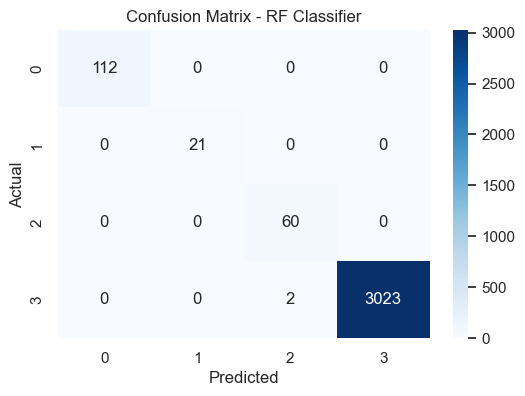

Confusion Matrix - Decision Tree:
[[ 112    0    0    0]
 [   0   21    0    0]
 [   0    0   60    0]
 [   0    0    0 3025]]



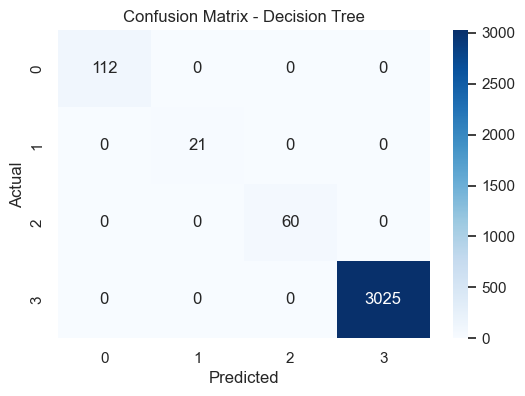

Confusion Matrix - Gaussian Naive Bayes:
[[ 111    1    0    0]
 [   0   21    0    0]
 [   0    0   48   12]
 [   0    0   18 3007]]



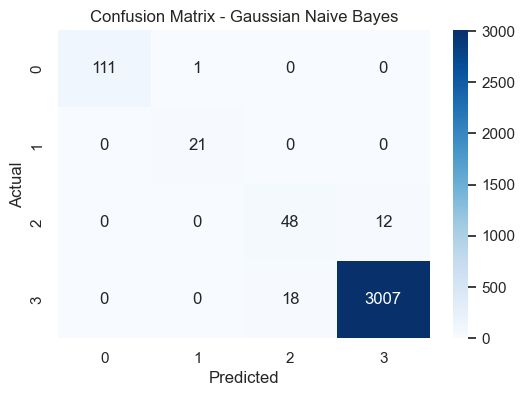

Confusion Matrix - Logistic Regression:
[[ 112    0    0    0]
 [   1   20    0    0]
 [   0    0   59    1]
 [   0    0    5 3020]]



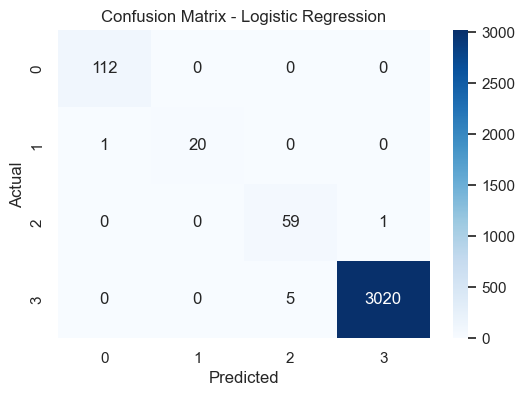

Confusion Matrix - SVM:
[[ 111    1    0    0]
 [   0   21    0    0]
 [   0    0   60    0]
 [   0    0    1 3024]]



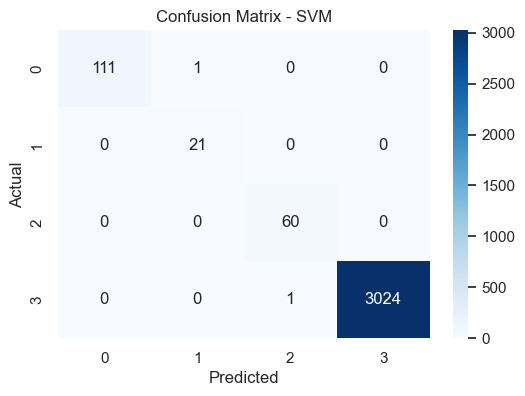

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = [rcf, dt, gnb, lrc, svm]
model_names = ['RF Classifier', 'Decision Tree', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(x_train_scaler, y_train_pred)

    # Make predictions on the test data
    y_pred = model.predict(x_test_scaler)

    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_pred, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# MODEL OPTIMIZATION

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [135]:
# Apply SMOTE to the training set
smote =  SMOTE(random_state=42)
x_train_resampled,y_train_resampled= smote.fit_resample(x_train_scaler, y_train)

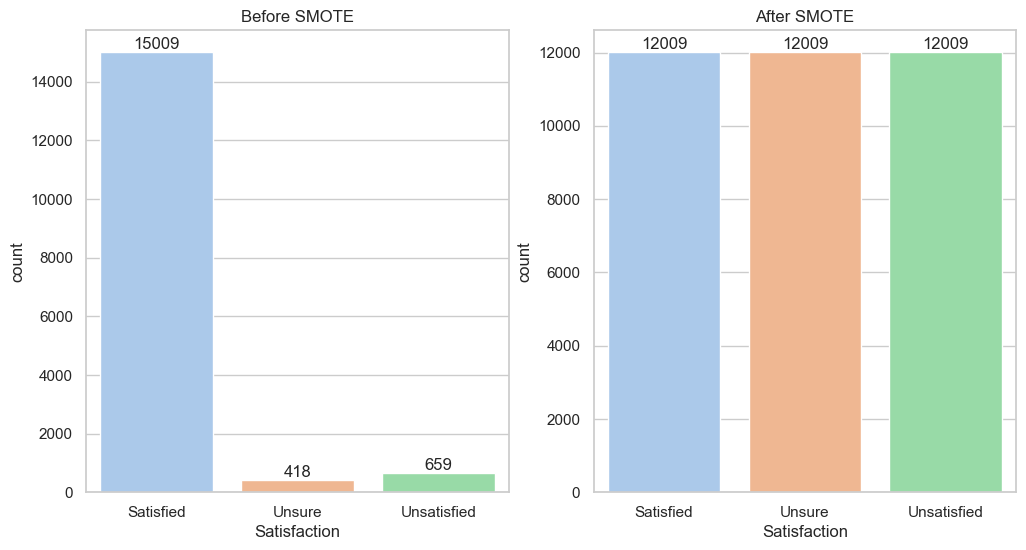

In [138]:
# Plot distribution of target variable before and after SMOTE
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(data=df2, x='Satisfaction', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before SMOTE')
axs[0].set_xticklabels(['Satisfied', 'Unsure', "Unsatisfied"])

sns.countplot(data=pd.DataFrame(y_train_resampled, columns=['Satisfaction']), x='Satisfaction', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After SMOTE')
axs[1].set_xticklabels(['Satisfied', 'Unsure', "Unsatisfied"])

plt.show()


In [139]:
# checking the shape of the train and test datasets

print("The shape of x_train_resampled is: ",x_train_resampled.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train_resampled is: ",y_train_resampled.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_resampled is:  (36027, 5)
The shape of x_test_scaler is:  (3218, 5)
The shape of y_train_resampled is:  (36027, 1)
The shape of y_test is:  (3218, 1)


In [144]:
svm

SVC(kernel='linear', random_state=42)

In [145]:
#Cretae list of models
model_list = [rcf, dt, lrc, svm, gnb]

models = [
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42),
    SVC(kernel='linear', random_state=42)
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_resampled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [1. 1. 1. 1. 1.]
Average accuracy for DecisionTreeClassifier: 1.0

Accuracy for GaussianNB: [0.99611435 0.99653067 0.99722415 0.99736294 0.99736294]
Average accuracy for GaussianNB: 0.9969190105477296



/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Accuracy for KNeighborsClassifier: [0.99986123 0.99972245 0.99972241 0.99944483 0.99972241]
Average accuracy for KNeighborsClassifier: 0.9996946680449614



/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686:

Accuracy for RandomForestClassifier: [1. 1. 1. 1. 1.]
Average accuracy for RandomForestClassifier: 1.0



/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Accuracy for SVC: [1. 1. 1. 1. 1.]
Average accuracy for SVC: 1.0



/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
gnb = GaussianNB()
svm = SVC(kernel='linear', random_state=42)
rcf = RandomForestClassifier(random_state=42),

In [159]:
# Create a dictionary of models
models = {
    'DecisionTreeClassifier': dt,
    'GaussianNB': gnb,
    'KNeighborsClassifier': knn,
    'SVM': svm,
    'RFC': rcf
}

In [162]:
# Create a dictionary of models
models = {
    'DecisionTreeClassifier': dt,
    'GaussianNB': gnb,
#     'KNeighborsClassifier': knn,
    'SVM': svm,
#     'RFC': rcf
}

# Iterate over the models
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy}')

DecisionTreeClassifier: Accuracy = 1.0
GaussianNB: Accuracy = 0.9944064636420137


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM: Accuracy = 1.0


In [163]:
# knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
# knn_grid_search.fit(x_train_resampled, y_train_resampled)

# # Train the final model on the entire resampled training set with the best hyperparameters for each model
# best_knn = KNeighborsClassifier(**knn_grid_search.best_params_)
# best_knn.fit(x_train_resampled, y_train_resampled)

# # Get the training accuracy score
# train_knn_accuracy = best_knn.score(x_train_resampled, y_train_resampled)

# # Evaluate the final model on the test set
# knn_y_pred = best_knn.predict(x_test_scaler)
# knn_accuracy = accuracy_score(y_test, knn_y_pred)
# knn_confusion = confusion_matrix(y_test, knn_y_pred)

# # Print the evaluation results
# print("KNN Classifier")
# print("Training Accuracy:", train_knn_accuracy)
# print("Test Accuracy:", knn_accuracy)


In [165]:
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train_resampled, y_train_resampled)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_dt = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42)
best_dt.fit(x_train_resampled, y_train_resampled)
# Get the training accuracy score
train_dt_accuracy = best_dt.score(x_train_resampled, y_train_resampled)

# Evaluate the final models on the test set for each model
dt_y_pred = best_dt.predict(x_test_scaler)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_confusion = confusion_matrix(y_test, dt_y_pred)

# Print the evaluation results
print("Decision Tree Classifier")
print("Training Accuracy:", train_dt_accuracy)
print("Test Accuracy:", dt_accuracy)

Decision Tree Classifier
Training Accuracy: 1.0
Test Accuracy: 1.0


In [166]:
print("Confusion matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("Classification report:\n", classification_report(y_test, dt_y_pred))

Confusion matrix:
 [[3000    0    0]
 [   0   74    0]
 [   0    0  144]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       144

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



In [167]:
gnb_grid_search = GridSearchCV(gnb, gnb_param_grid, cv=5, scoring='accuracy')
gnb_grid_search.fit(x_train_resampled, y_train_resampled)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_gnb = GaussianNB(**gnb_grid_search.best_params_)
best_gnb.fit(x_train_resampled, y_train_resampled)

# Get the training accuracy score
train_gnb_accuracy = best_gnb.score(x_train_resampled, y_train_resampled)

# Evaluate the final models on the test set for each model
gnb_y_pred = best_gnb.predict(x_test_scaler)
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_confusion = confusion_matrix(y_test, gnb_y_pred)

# Print the evaluation results
print("GaussianNB")
print("Training Accuracy:", train_gnb_accuracy)
print("Test Accuracy:", gnb_accuracy)

/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

GaussianNB
Training Accuracy: 0.9970022483137647
Test Accuracy: 0.9944064636420137


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [168]:
print("Confusion matrix:\n", confusion_matrix(y_test, gnb_y_pred))
print("Classification report:\n", classification_report(y_test, gnb_y_pred))

Confusion matrix:
 [[2982   18    0]
 [   0   74    0]
 [   0    0  144]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3000
           1       0.80      1.00      0.89        74
           2       1.00      1.00      1.00       144

    accuracy                           0.99      3218
   macro avg       0.93      1.00      0.96      3218
weighted avg       1.00      0.99      0.99      3218



In [170]:
# Create a dictionary of model names and their evaluation results
results = {'Decision Tree': [dt_accuracy, train_dt_accuracy],
#            'KNeighborsClassifier': [knn_accuracy, train_knn_accuracy],
           'Gaussian NB': [gnb_accuracy, train_gnb_accuracy]}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy', 'Training Accuracy'])

# Display the DataFrame
print(df_results)

               Test Accuracy  Training Accuracy
Decision Tree       1.000000           1.000000
Gaussian NB         0.994406           0.997002


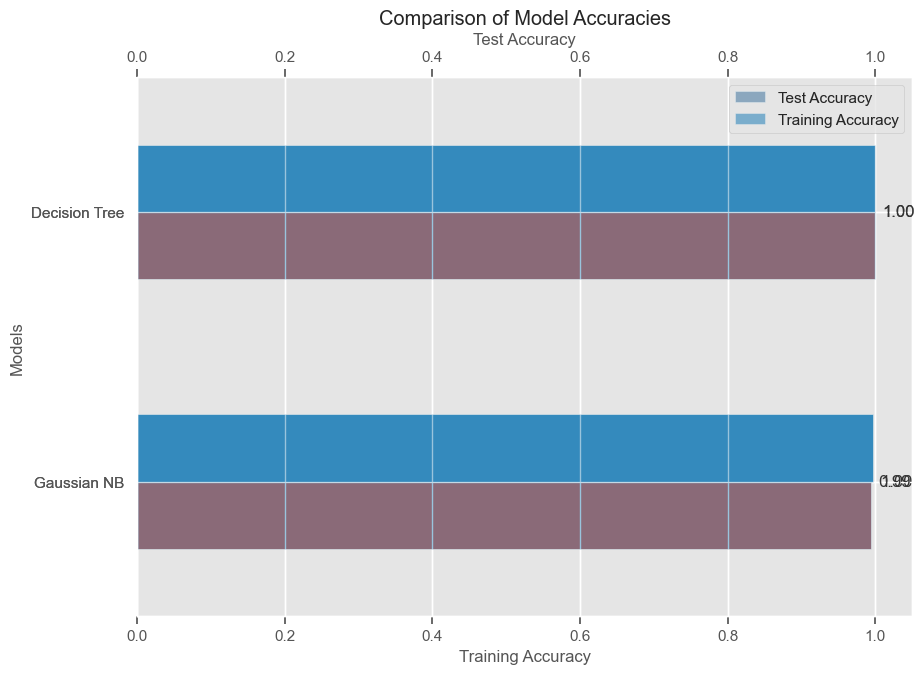

In [171]:
# Set the plot style
plt.style.use('ggplot')

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
df_results.sort_values('Training Accuracy', ascending=True).plot(kind='barh', ax=ax)
# create 2nd Axis
ax2 = ax.twiny()
df_results.sort_values('Test Accuracy', ascending=True).plot(kind='barh', ax=ax2, alpha=0.5, color='C1')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Test Accuracy')

# Add the axis labels and Title
ax.set_xlabel('Training Accuracy')
ax.set_ylabel('Models')
ax.set_title('Comparison of Model Accuracies')

#Add Data Labels for Training Accuracy
for i, v in enumerate(df_results['Training Accuracy'].sort_values()):
    ax.text(v + 0.01, i, f'{v:.2f}', color='#333333', fontsize=12, va='center')

#Add Data Labels for Test Accuracy
for i, v in enumerate(df_results['Test Accuracy'].sort_values()):
    ax2.text(v + 0.01, i, f'{v:.2f}', color='#333333', fontsize=12, va='center')
# Show the plot
plt.show()

In [100]:
#Create a list for models
models = ['Random Forest Classifier','Decision Tree Classifier','Gaussian Naive Bayes', ]

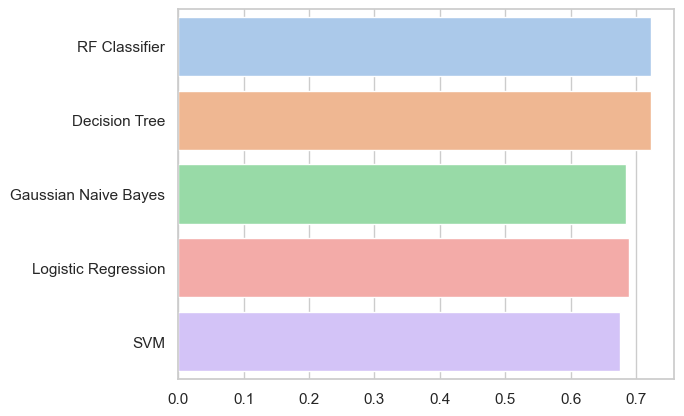

In [60]:
#visualizing the train model accuracy
sns.barplot(y=model_names,x=train_acc)
plt.show()

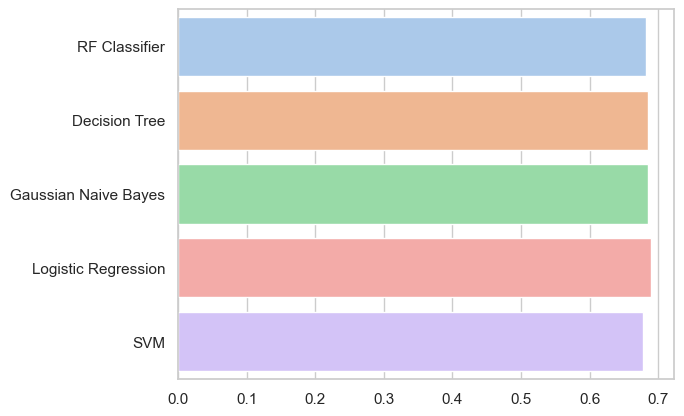

In [61]:
# visualizing the test model accuracy
sns.barplot(y=model_names,x=test_acc)
plt.show()

In [62]:
#Display summary of the performance
rcf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [RandomForestClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  LogisticRegression(random_state=42),
  SVC(),
  GaussianNB()],
 'Train Score': [0.72194591234069,
  0.72194591234069,
  0.6838669567920422,
  0.6886851103512589,
  0.6753186198321417],
 'Test Score': [0.68272218769422,
  0.685208203853325,
  0.6858297078931013,
  0.6889372280919825,
  0.6774394033561218]}

In [57]:
model_l = ['Random Forest Classifier', 'Decision Tree Classifier', 'Guassian Naive Bayes Classifier']

In [69]:
#plot a table to show the summary
model_summary = pd.DataFrame({'Model':model_names,'Train Score':train_acc,'Test Score':test_acc})
#                              'Train Precision': train_pre, 'Test Precision': test_pre,
#                              'Train Recall': train_rec, 'Test Recall':test_pre,
#                              'Train F1 score': train_f1, 'Test F1 score': test_f1}
#                             )
model_summary


,Model,Train Score,Test Score
0,RF Classifier,0.721946,0.682722
1,Decision Tree,0.721946,0.685208
2,Gaussian Naive Bayes,0.683867,0.685830
3,Logistic Regression,0.688685,0.688937
4,SVM,0.675319,0.677439


In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [rcf, dt, gnb, lrc]
# model_names = ['RC Classifier', 'Decision Tree', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.4f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

/var/folders/v9/y2qkf5bd43gg37qjgt5sfhvc0000gn/T/ipykernel_5566/2211409875.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


ValueError: multiclass format is not supported

<Figure size 800x600 with 0 Axes>